In [1]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from lib.nuscenes_eval_core import NuScenesEval

In [ ]:
# python nuscenes_eval.py
# --pred_labels /home/onepiece/Projects/ADVL/Methods/ObjectDet_or_SemSeg/CADC/predictions/cadc_preds_wo_filter/ 
# --gt_labels /home/onepiece/Projects/ADVL/Methods/ObjectDet_or_SemSeg/CADC/predictions/cadc_gts/ 
# --save_loc /home/onepiece/Projects/ADVL/Methods/ObjectDet_or_SemSeg/CADC/results/wo_filter/ 
# --min_range 0.0 
# --max_range 60.0 
# --min_score 0.2 
# --classes vehicle person 
# --d_th 0.5

In [2]:
filter_range = list(itertools.product(["No-Filter", "ROR", "SOR", "DROR", "DSOR", "LIOR", "DDIOR"], [0, 3, 5, 10]))  

In [3]:
columns = ["Filter", "Range", "Number_GT", "Total_Detection", "TP", "FP", "mAP", "F1_Score", "Avg_Translation_Error_2D", "Avg_Translation_Error_3D", "Avg_Scale_Error", "Avg_Rotation_Error"]
index = list(range(len(filter_range)))
df_vehicle_res = pd.DataFrame([], index=index, columns=columns)
df_person_res = pd.DataFrame([], index=index, columns=columns)

In [18]:
for idx, (fname, rng) in enumerate(tqdm(filter_range)):    
    nuscene = NuScenesEval(pred_label_path=f"predictions/cadc_preds_{fname}", 
                           gt_label_path="predictions/cadc_gts/", 
                           label_format="class x y z l w h r score", 
                           save_loc=f"results/cadc_res_{fname}_{rng}",
                           classes=['vehicle', 'person'],
                           distance_threshold=0.5,
                           min_score=0.3,
                           min_range=float(rng),
                           max_range=50.0)
    try:
        res_dict = nuscene.evaluate()

        df_vehicle_res.loc[idx] = (fname, 
                                   rng, 
                                   res_dict["vehicle"]["Number_GT"],
                                   res_dict["vehicle"]["Total_Detection"],
                                   res_dict["vehicle"]["TP"],
                                   res_dict["vehicle"]["FP"],
                                   res_dict["vehicle"]["mAP"],
                                   res_dict["vehicle"]["F1_Score"],
                                   res_dict["vehicle"]["Avg_Translation_Error_2D"],
                                   res_dict["vehicle"]["Avg_Translation_Error_3D"],
                                   res_dict["vehicle"]["Avg_Scale_Error"],
                                   res_dict["vehicle"]["Avg_Rotation_Error"]
                                  )
        df_person_res.loc[idx] = (fname, 
                                   rng, 
                                   res_dict["person"]["Number_GT"],
                                   res_dict["person"]["Total_Detection"],
                                   res_dict["person"]["TP"],
                                   res_dict["person"]["FP"],
                                   res_dict["person"]["mAP"],
                                   res_dict["person"]["F1_Score"],
                                   res_dict["person"]["Avg_Translation_Error_2D"],
                                   res_dict["person"]["Avg_Translation_Error_3D"],
                                   res_dict["person"]["Avg_Scale_Error"],
                                   res_dict["person"]["Avg_Rotation_Error"]
                                  )
    except:
        print(f"Failed for {fname} and {rng}m.")

  0%|          | 0/28 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Vehicle Detection mAP.')

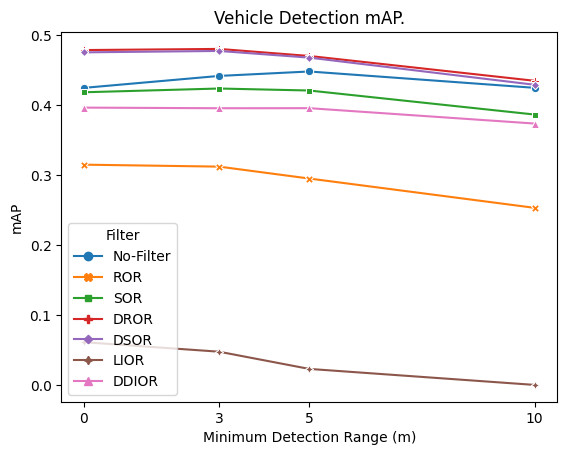

In [36]:
sns.lineplot(data=df_vehicle_res, x="Range", y="mAP", hue="Filter", style="Filter", markers=True, dashes=False)
plt.xticks([0, 3, 5, 10])
plt.xlabel("Minimum Detection Range (m)")
plt.ylabel("mAP")
plt.title("Vehicle Detection mAP.")

Text(0.5, 1.0, 'Person Detection mAP.')

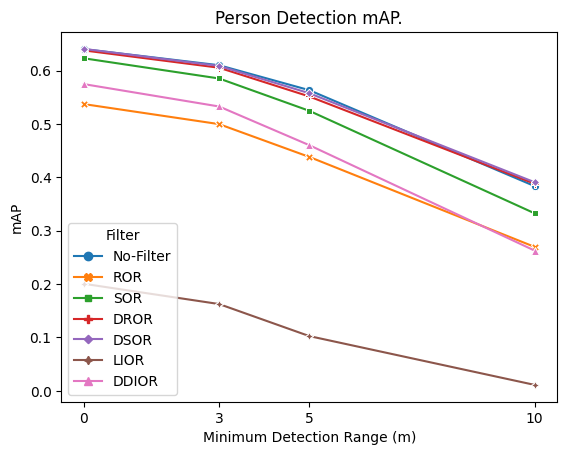

In [25]:
sns.lineplot(data=df_person_res, x="Range", y="mAP", hue="Filter", style="Filter", markers=True, dashes=False)
plt.xticks([0, 3, 5, 10])
plt.xlabel("Minimum Detection Range (m)")
plt.title("Person Detection mAP.")

Text(0.5, 1.0, 'Vehicle Detection mAP.')

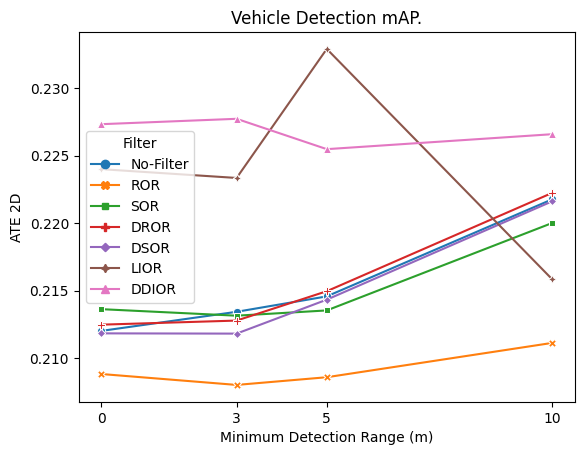

In [30]:
sns.lineplot(data=df_vehicle_res, x="Range", y="Avg_Translation_Error_2D", hue="Filter", style="Filter", markers=True, dashes=False)
plt.xticks([0, 3, 5, 10])
plt.xlabel("Minimum Detection Range (m)")
plt.ylabel("ATE 2D")
plt.title("Vehicle Detection mAP.")

Text(0.5, 1.0, 'Person Detection mAP.')

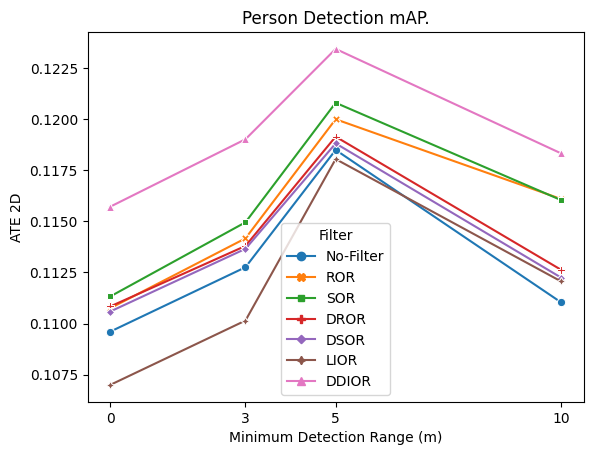

In [31]:
sns.lineplot(data=df_person_res, x="Range", y="Avg_Translation_Error_2D", hue="Filter", style="Filter", markers=True, dashes=False)
plt.xticks([0, 3, 5, 10])
plt.xlabel("Minimum Detection Range (m)")
plt.ylabel("ATE 2D")
plt.title("Person Detection mAP.")

In [13]:
import numpy as np
from pathlib import Path

In [9]:
dfs = []
names=["class", "x", "y", "z", "l", "w", "h", "r"]
gt_files = sorted(Path("predictions/cadc_gts/").glob("*.txt"))
for gt_file in gt_files:
    df = pd.read_csv(gt_file,names=names)
    dfs.append(df)

In [11]:
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)

In [14]:
distances = np.linalg.norm(dfs.loc[dfs["class"]=="person", ("x", "y", "z")].to_numpy(),axis=1)

In [16]:
hist, bin_edges = np.histogram(distances, bins=np.arange(60))

In [17]:
hist

array([  0,   0,   0,   1,  26,  73,  50,  57,  51,  56,  66,  65,  69,
        60,  69,  83,  72,  82,  69,  64,  57,  62,  66,  75,  74,  78,
        62,  80,  70, 123, 156,  90,  61,  67,  65,  50,  72,  54,  49,
        42,  42,  43,  36,  46,  42,  32,  38,  32,  42,  31,  11,  13,
        11,  10,   0,   1,   0,   1,   0])